In [1]:
import gym
from gym import wrappers
import warnings
import numpy as np
import time
from tqdm.auto import tqdm, trange
import matplotlib.pyplot as plt
from cryoenv.agents import SAC
from PIL import Image, ImageDraw
%config InlineBackend.figure_formats = ['svg']

In [2]:
warnings.simplefilter('ignore')
gym.logger.set_level(40)

In [3]:
env = gym.make('Pendulum-v1', render_mode='rgb_array').env  
# InvertedPendulum-v4, MountainCarContinuous-v0, Pendulum-v1, InvertedDoublePendulum-v4, Reacher-v4, Hopper-v2

In [ ]:
obs = env.reset()

In [ ]:
model = SAC(env, policy = "GaussianPolicy", critic = "QNetwork", lr=1e-3, buffer_size=int(1e6), learning_starts=0,
            batch_size=512, gamma=.9999, target_update_interval=1, gradient_steps=1, hidden_dims=[64, 64],
            tau = 0.01, temperature=0.1, )

In [6]:
model.learn(episodes = 100, episode_steps = 100, writer=None, two_pbars=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [49]:
obs, _ = env.reset()
model.policy.eval()
returns = 0
frames = []

for i in trange(100):
    action = model.predict(obs).flatten().detach().numpy()
    obs, reward, terminated, truncated, info = env.step(action)
    returns += reward
    frames.append(env.render())
    if terminated or truncated:
        obs, _ = env.reset()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

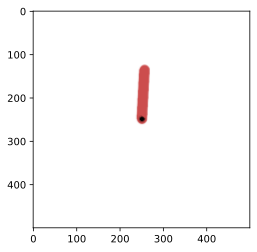

In [76]:
img = []

for i, frame in tqdm(enumerate(frames), total=len(frames)):
    
    plt.close()
    plt.imshow(frame)
    if i == 0:
        plt.text(420,480, 'reset')
    plt.savefig(f'img/frame_{i}.png')
    # plt.show()
    # break
    
    img.append(Image.open(f'img/frame_{i}.png'))
    
    img[0].save('img/movie.gif', format='GIF', save_all=True, append_images=img[1:], duration=50, loop=0)

In [ ]:
env.close()